In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import time
import seaborn as sns
import import_ipynb
from mnist import load_mnist
from two_layer_net import TwoLayerNet

importing Jupyter notebook from mnist.ipynb
importing Jupyter notebook from two_layer_net.ipynb
importing Jupyter notebook from layers.ipynb
importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from util.ipynb
importing Jupyter notebook from gradient.ipynb


In [2]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
print(x_train.shape)

(60000, 784)


In [4]:
step = 1
data = np.empty([60000, math.ceil(x_train.shape[1] / step)])
for i in range(0, x_train.shape[0]):
    data[i] = x_train[i][0::step]

x_train = data

In [5]:
print(x_train.shape)

(60000, 784)


In [6]:
data = np.empty([10000, math.ceil(x_test.shape[1] / step)])
for i in range(0, x_test.shape[0]):
    data[i] = x_test[i][0::step]

x_test = data

In [7]:
print(x_test.shape)

(10000, 784)


In [8]:
input_size = x_test.shape[1]

In [9]:
network = TwoLayerNet(input_size=input_size, hidden_size=120, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []


iter_per_epoch = max(train_size / batch_size, 1)

start = time.time()

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1','W2', 'b2','W3', 'b3','W4', 'b4'):
        network.params[key] -= learning_rate * grad[key]
    
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        network
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

end = time.time();
print(f"{end - start: .5f} sec")
    
    

0.13188333333333332 0.1321
0.94535 0.9395
0.9616833333333333 0.9543
0.9661666666666666 0.9555
0.9747166666666667 0.9643
0.97995 0.9672
0.9808833333333333 0.9675
0.9850833333333333 0.9684
0.9867 0.969
0.9890166666666667 0.9732
0.9884833333333334 0.9708
0.9904666666666667 0.9725
0.99205 0.9731
0.9948166666666667 0.9732
0.9939833333333333 0.9722
0.9958833333333333 0.9737
0.9974 0.9765
 35.84964 sec


In [10]:
# 활성화 함수 분포 확인 0~10까지 존재 batch size = 1, iter_num 1인 상태에서 반드시 grad후에 바로 사용해야 제대로 볼 수 있음
# 갱신부분 아래로는 주석처리 하고 끼워 넣을 것
# sns.distplot(network.activations[1]) 

In [11]:
# network.activations[1]

In [12]:
# network.activations[1]

In [13]:
# # 갱신
#     for key in ('W1', 'b1','W2', 'b2','W3', 'b3','W4', 'b4','W5', 'b5','W6', 'b6'):
#         network.params[key] -= learning_rate * grad[key]
    
    
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
    
#     if i % iter_per_epoch == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         network
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print(train_acc, test_acc)

# end = time.time();
# print(f"{end - start: .5f} sec")

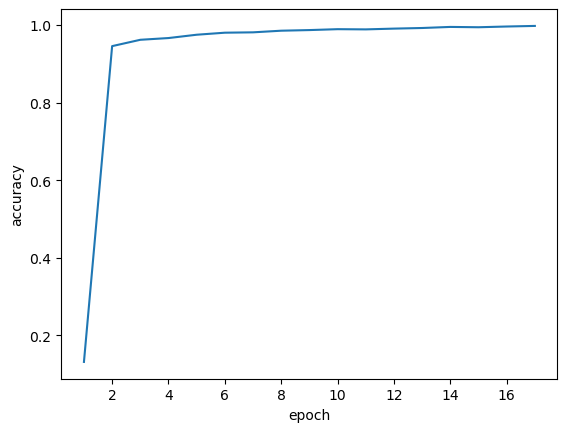

In [14]:
plt.plot(np.arange(1, 18), train_acc_list)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

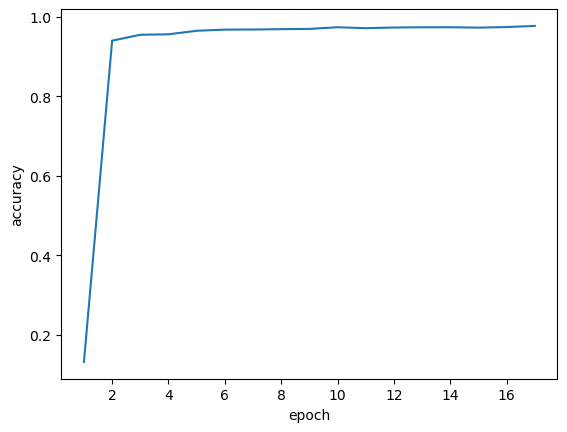

In [15]:
plt.plot(np.arange(1, 18), test_acc_list)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()